In [1]:
# Import useful Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV, train_test_split
from scipy.stats import loguniform
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool, cv

import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

In [2]:

# Step 3.1: Upload Data
"C:\D\IMPAS\Internship\Project\Time validation\Measurement 28.4 - Optagait vs IMU\IMU\20230428_094925_Unnamed_Unnamed).tsv" 
df = pd.read_csv("C:/D/IMPAS/Internship/Project/Time validation\Measurement 28.4 - Optagait vs IMU/IMU/20230428_094925_Unnamed_Unnamed).tsv" , sep='\t')
df1 = df.copy()

In [3]:
df1.head()

,Unnamed: 0,Right,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Left,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Time,ax,ay,az,qx,qy,qz,qw,ax,ay,az,qx,qy,qz,qw,NaN
1,"0,000","-0,058","-0,174","0,148","-0,458","-0,545","0,538","0,451","-1,480","1,481","-1,069","-0,000","0,018","-0,074","-0,997",NaN
2,"0,016","-0,355","-0,345","0,244","-0,458","-0,545","0,538","0,451","-1,416","1,255","-0,903","-0,000","0,018","-0,074","-0,997",NaN
3,"0,032","-0,041","-0,640","0,176","-0,458","-0,545","0,538","0,451","-1,120","0,836","-0,439","-0,000","0,018","-0,074","-0,997",NaN
4,"0,048","-0,123","-0,586","0,103","-0,458","-0,545","0,538","0,451","-0,946","0,705","-0,171","-0,000","0,018","-0,074","-0,997",NaN


In [4]:
df.columns

Index(['Unnamed: 0', 'Right', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Left', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [5]:
df = df.drop(index=0)


In [6]:
df.head()

,Unnamed: 0,Right,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Left,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
1,"0,000","-0,058","-0,174","0,148","-0,458","-0,545","0,538","0,451","-1,480","1,481","-1,069","-0,000","0,018","-0,074","-0,997",NaN
2,"0,016","-0,355","-0,345","0,244","-0,458","-0,545","0,538","0,451","-1,416","1,255","-0,903","-0,000","0,018","-0,074","-0,997",NaN
3,"0,032","-0,041","-0,640","0,176","-0,458","-0,545","0,538","0,451","-1,120","0,836","-0,439","-0,000","0,018","-0,074","-0,997",NaN
4,"0,048","-0,123","-0,586","0,103","-0,458","-0,545","0,538","0,451","-0,946","0,705","-0,171","-0,000","0,018","-0,074","-0,997",NaN
5,"0,064","-0,186","-0,342","-0,028","-0,458","-0,545","0,538","0,451","-0,832","0,524","0,018","-0,000","0,018","-0,074","-0,997",NaN


In [7]:
new_column_names = ['Time', 'Ax_R','Ay_R','Az_R','Gx_R','Gy_R','Gz_R','Ax_L','Ay_L','Az_L','Gx_L','Gy_L','Gz_L']

In [8]:
df = df.drop(columns = ['Unnamed: 7','Unnamed: 14', 'Unnamed: 15'])

In [9]:
df.columns = new_column_names

In [10]:
df

,Time,Ax_R,Ay_R,Az_R,Gx_R,Gy_R,Gz_R,Ax_L,Ay_L,Az_L,Gx_L,Gy_L,Gz_L
1,"0,000","-0,058","-0,174","0,148","-0,458","-0,545","0,538","-1,480","1,481","-1,069","-0,000","0,018","-0,074"
2,"0,016","-0,355","-0,345","0,244","-0,458","-0,545","0,538","-1,416","1,255","-0,903","-0,000","0,018","-0,074"
3,"0,032","-0,041","-0,640","0,176","-0,458","-0,545","0,538","-1,120","0,836","-0,439","-0,000","0,018","-0,074"
4,"0,048","-0,123","-0,586","0,103","-0,458","-0,545","0,538","-0,946","0,705","-0,171","-0,000","0,018","-0,074"
5,"0,064","-0,186","-0,342","-0,028","-0,458","-0,545","0,538","-0,832","0,524","0,018","-0,000","0,018","-0,074"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,"4,064","0,006","0,051","-0,004","-0,458","-0,545","0,538","0,086","-0,096","0,063","-0,000","0,018","-0,074"
256,"4,080","0,003","0,054","-0,004","-0,458","-0,545","0,538","0,069","-0,012","0,021","-0,000","0,018","-0,074"
257,"4,096","-0,002","0,039","-0,002","-0,458","-0,545","0,538","0,091","-0,034","-0,081","-0,000","0,018","-0,074"
258,"4,112","-0,001","0,042","-0,004","-0,458","-0,545","0,538","0,109","0,027","-0,013","-0,000","0,018","-0,074"


In [11]:
#df['Unnamed: 0'] = df['Unnamed: 0'].str.replace(',', '').astype(float)
#df['Unnamed: 0'] = df['Unnamed: 0'].astype(float)
def remove_commas_and_convert(column):
    return column.str.replace(',', '',regex = False).astype(float)


df = df.apply(remove_commas_and_convert,axis =0)
    

In [16]:
df

,Time,Ax_R,Ay_R,Az_R,Gx_R,Gy_R,Gz_R,Ax_L,Ay_L,Az_L,Gx_L,Gy_L,Gz_L
1,0.0,-58.0,-174.0,148.0,-458.0,-545.0,538.0,-1480.0,1481.0,-1069.0,-0.0,18.0,-74.0
2,16.0,-355.0,-345.0,244.0,-458.0,-545.0,538.0,-1416.0,1255.0,-903.0,-0.0,18.0,-74.0
3,32.0,-41.0,-640.0,176.0,-458.0,-545.0,538.0,-1120.0,836.0,-439.0,-0.0,18.0,-74.0
4,48.0,-123.0,-586.0,103.0,-458.0,-545.0,538.0,-946.0,705.0,-171.0,-0.0,18.0,-74.0
5,64.0,-186.0,-342.0,-28.0,-458.0,-545.0,538.0,-832.0,524.0,18.0,-0.0,18.0,-74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,4064.0,6.0,51.0,-4.0,-458.0,-545.0,538.0,86.0,-96.0,63.0,-0.0,18.0,-74.0
256,4080.0,3.0,54.0,-4.0,-458.0,-545.0,538.0,69.0,-12.0,21.0,-0.0,18.0,-74.0
257,4096.0,-2.0,39.0,-2.0,-458.0,-545.0,538.0,91.0,-34.0,-81.0,-0.0,18.0,-74.0
258,4112.0,-1.0,42.0,-4.0,-458.0,-545.0,538.0,109.0,27.0,-13.0,-0.0,18.0,-74.0


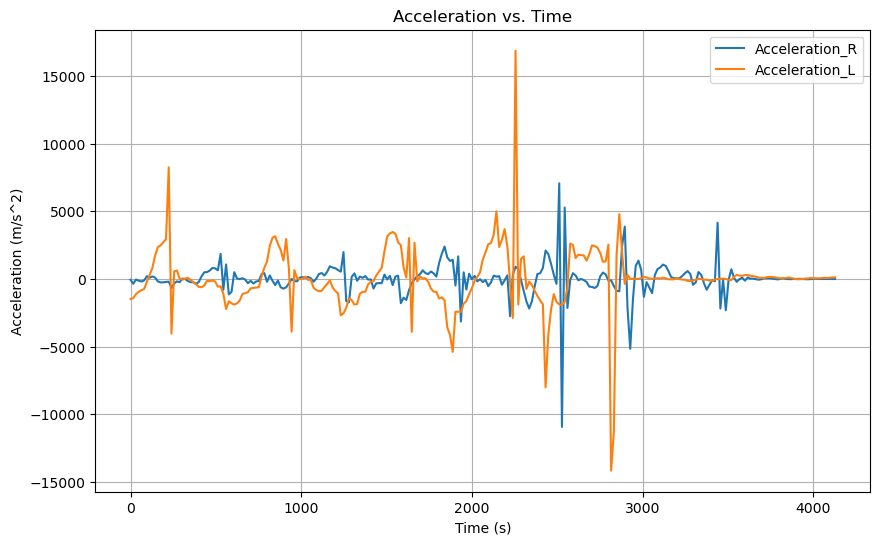

In [17]:
# Step 3.3: Plotting the Data
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Ax_R'], label='Acceleration_R')
plt.plot(df['Time'], df['Ax_L'], label='Acceleration_L')
plt.title('Acceleration vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()


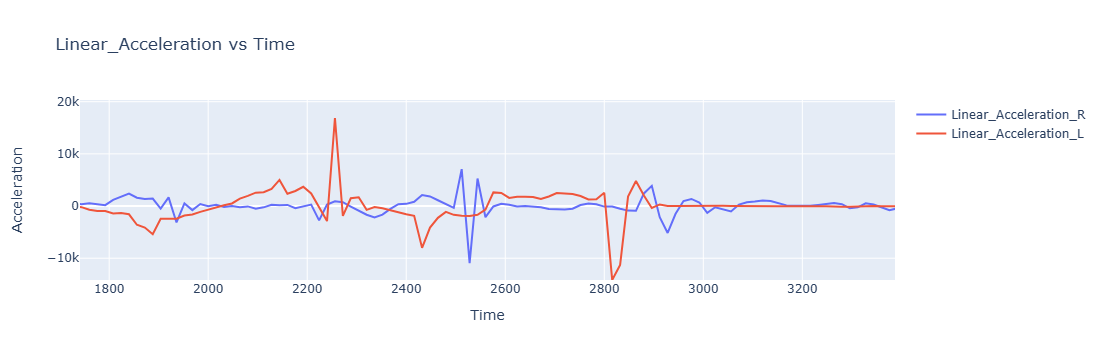

In [21]:
import plotly.graph_objects as go
import pandas as pd

#Sample data (replace with your actual data)
#time_column = [0, 1, 2, 3, 4, 5]
#acceleration1_column = [10, 12, 15, 18, 20, 22]
#acceleration2_column = [8, 11, 14, 16, 19, 21]
#
## Create traces for each acceleration column
#trace1 = go.Scatter(x=Time, y=acceleration1_column, mode='lines', name='Acceleration 1')
#trace2 = go.Scatter(x=time_column, y=acceleration2_column, mode='lines', name='Acceleration 2')
#
## Create the figure with traces
#fig = go.Figure([trace1, trace2])
#
## Customize layout
#fig.update_layout(title='Acceleration vs Time',
#                  xaxis_title='Time',
#                  yaxis_title='Acceleration')
#
## Display the plot
#fig.show()


trace1 = go.Scatter(x=df['Time'], y=df['Ax_R'], mode='lines', name='Linear_Acceleration_R')
trace2 = go.Scatter(x=df['Time'], y=df['Ax_L'], mode='lines', name='Linear_Acceleration_L')
#Create the figure with traces
fig = go.Figure([trace1, trace2])

# Customize layout
fig.update_layout(title='Linear_Acceleration vs Time',
                  xaxis_title='Time',
                  yaxis_title='Acceleration')

# Display the plot
fig.show()


In [22]:
frames = df['Time']/60

In [23]:
frames

1       0.000000
2       0.266667
3       0.533333
4       0.800000
5       1.066667
         ...    
255    67.733333
256    68.000000
257    68.266667
258    68.533333
259    68.800000
Name: Time, Length: 259, dtype: float64

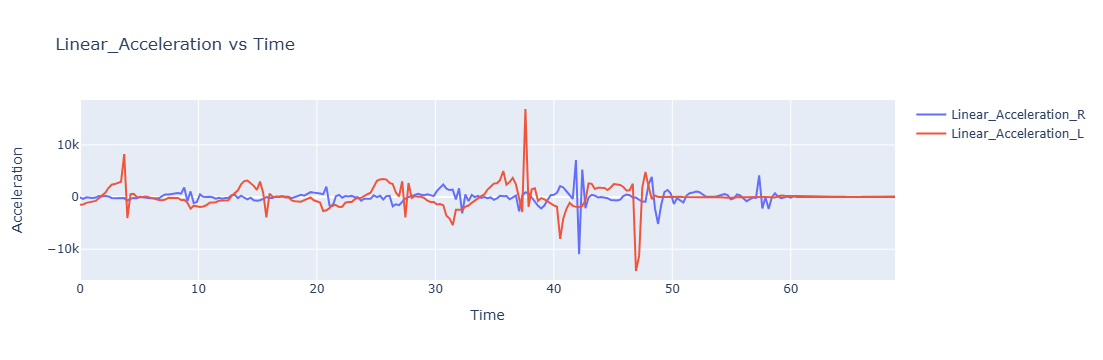

In [24]:
import plotly.graph_objects as go
import pandas as pd

trace1 = go.Scatter(x=frames, y=df['Ax_R'], mode='lines', name='Linear_Acceleration_R')
trace2 = go.Scatter(x=frames, y=df['Ax_L'], mode='lines', name='Linear_Acceleration_L')
#Create the figure with traces
fig = go.Figure([trace1, trace2])

# Customize layout
fig.update_layout(title='Linear_Acceleration vs Time',
                  xaxis_title='Time',
                  yaxis_title='Acceleration')

# Display the plot
fig.show()
